In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db', mask=mask_file)

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2)

07/19/2019 14:06:50 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:51 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:51 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/19/2019 14:06:52 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/su

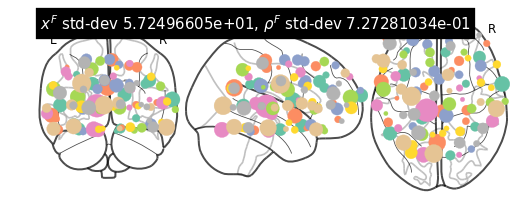

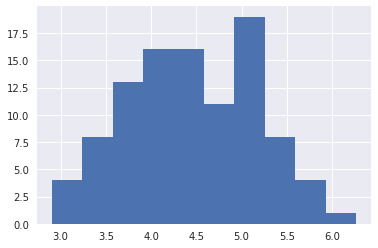

(<nilearn.plotting.displays.OrthoProjector at 0x7fd8c04dacc0>,
 tensor([[ 8.3577e+00, -2.5510e+01, -2.2831e+01],
         [-3.3269e+01,  3.9827e+01,  3.6959e+01],
         [-1.6817e+01, -3.0766e+01,  2.7306e+01],
         [ 4.3498e+01,  3.3044e+01,  3.0295e+01],
         [-5.0589e+01, -4.7044e+01,  4.5423e+00],
         [ 3.8901e+01, -4.0067e+01,  2.7040e+01],
         [ 2.9222e+01,  5.1603e+00, -9.1279e+00],
         [ 1.7146e+01,  7.6845e+01,  1.5506e+01],
         [-3.6139e+01,  1.4521e+01, -1.6266e+01],
         [-3.0885e+01, -8.2704e+00, -2.0482e+01],
         [ 1.2857e+01, -7.0167e+01, -1.9938e+01],
         [ 7.8404e+00,  3.8219e+01,  2.3544e+01],
         [ 6.7374e+01,  4.8858e+00,  1.0638e+01],
         [ 2.2061e+01,  2.9134e+01,  4.6236e+01],
         [ 5.1147e+01,  4.7540e+01,  7.3935e+00],
         [-4.3353e+01, -1.0068e+01,  4.4832e+01],
         [-5.4648e+01,  5.2489e+01, -9.7809e+00],
         [-9.0769e-01, -5.6776e+01,  2.3507e+01],
         [ 3.6437e+00, -2.3896e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=60, patience=100)

07/19/2019 14:08:47 [Epoch 1] (58100ms) Posterior free-energy 2.87404896e+08 = KL from prior 2.29373175e+06 - log-likelihood -2.85111072e+08
07/19/2019 14:08:47 Saving checkpoint...
07/19/2019 14:09:46 [Epoch 2] (58942ms) Posterior free-energy 2.71361376e+08 = KL from prior 2.21778925e+06 - log-likelihood -2.69143584e+08
07/19/2019 14:10:46 [Epoch 3] (60486ms) Posterior free-energy 2.65923920e+08 = KL from prior 2.17838850e+06 - log-likelihood -2.63745536e+08
07/19/2019 14:11:47 [Epoch 4] (60206ms) Posterior free-energy 2.63385952e+08 = KL from prior 2.14001725e+06 - log-likelihood -2.61245920e+08
07/19/2019 14:12:45 [Epoch 5] (58084ms) Posterior free-energy 2.61956576e+08 = KL from prior 2.09079625e+06 - log-likelihood -2.59865808e+08
07/19/2019 14:13:43 [Epoch 6] (57539ms) Posterior free-energy 2.60962784e+08 = KL from prior 2.02501550e+06 - log-likelihood -2.58937728e+08
07/19/2019 14:14:40 [Epoch 7] (56871ms) Posterior free-energy 2.60343216e+08 = KL from prior 1.94481550e+06 - log

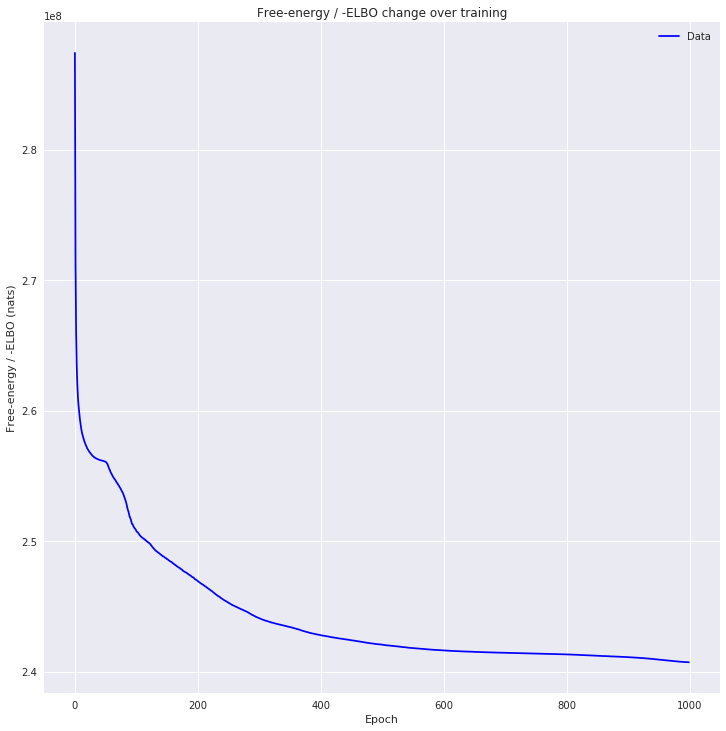

In [9]:
utils.plot_losses(losses)

In [10]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [11]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [12]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

In [13]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

TypeError: expected string or bytes-like object

In [ ]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.average_reconstruction_error()

In [ ]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

In [ ]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)

In [ ]:
dtfa.average_reconstruction_error(weighted=False)